In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data\\UCI_Credit_Card.csv")
df.rename({'default.payment.next.month' : 'Default'}, axis = 'columns', inplace = True)
df.drop('ID', axis=1, inplace= True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [3]:
df['SEX'].unique()


array([2, 1], dtype=int64)

In [4]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [5]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [6]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [7]:
df_clean = df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]
print(len(df))
print(len(df_clean))


30000
29932


In [8]:
df_clean['EDUCATION'].unique()


array([2, 1, 3, 5, 4, 6], dtype=int64)

In [9]:
df_clean['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
df_default_1 = df_clean[df_clean['Default'] == 0]
df_default_0 = df_clean[df_clean['Default'] == 1]

In [11]:
df_default_0_downsample = resample(df_default_0, replace=False, n_samples=1000, random_state=42)
df_default_1_downsample = resample(df_default_1, replace=False, n_samples=1000, random_state=42)

In [12]:
df_downsample = pd.concat([df_default_0_downsample, df_default_1_downsample])
print(len(df_downsample))

2000


In [13]:
df_downsample.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [14]:
value = df_downsample.iloc[: , : -1];
label = df_downsample.iloc[: , -1: ].to_numpy().ravel();

In [15]:
value_encode = pd.get_dummies(value, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
# encode.head()

In [16]:
value_train, value_test, label_train, label_test = train_test_split(value_encode, label, test_size=0.2, random_state=2)

In [17]:
value_train = scale(value_train)
value_test = scale(value_test)

In [18]:
model_svm = SVC()
model_svm.fit(value_train, label_train)
label_pred = model_svm.predict(value_test);

Accuracy: 71.5%
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       218
           1       0.71      0.63      0.67       182

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



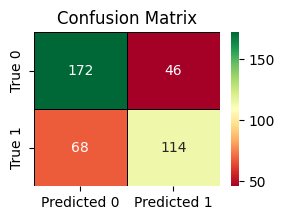

In [19]:
# The reports and confusion matrix
accuracy = accuracy_score(label_test, label_pred)
print(f'Accuracy: {accuracy*100}%')
print(classification_report(label_test, label_pred))

#making a heatmap for confusion matrix, looks better nothing else
matrix = (confusion_matrix(label_test, label_pred))
new_matrix = pd.DataFrame(matrix, index = ['True 0', 'True 1'], columns= ['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(3, 2))
sns.heatmap(new_matrix, annot=True, fmt="d", cmap="RdYlGn", linewidths=.5, linecolor='black')
plt.title('Confusion Matrix')
plt.show()

In [20]:
param_grid = {
  'C' : [0.5, 1, 10, 100],
  'gamma' : ['scale', 1, 0.1, 0.01, 0.001],
  'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
}
optimal_param = GridSearchCV(
  SVC(),
  param_grid,
  cv=5,
  scoring = 'accuracy',
  verbose = 2,
)
optimal_param.fit(value_train, label_train)
print(optimal_param.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scal

In [36]:
model_svm_better = SVC(C=10, gamma=0.001, kernel='sigmoid')
model_svm_better.fit(value_train, label_train)

SVC(C=10, gamma=0.001, kernel='sigmoid')

In [37]:
label_pred = model_svm_better.predict(value_test)


Accuracy: 70.0%
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       218
           1       0.72      0.56      0.63       182

    accuracy                           0.70       400
   macro avg       0.70      0.69      0.69       400
weighted avg       0.70      0.70      0.69       400



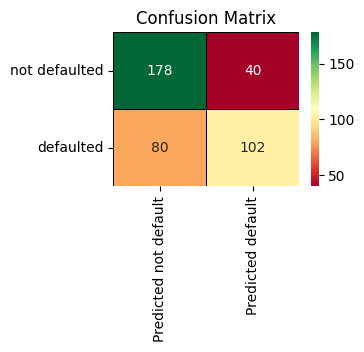

In [38]:
accuracy = accuracy_score(label_test, label_pred)
print(f'Accuracy: {accuracy*100}%')
print(classification_report(label_test, label_pred))

#making a heatmap for confusion matrix, looks better nothing else
matrix = (confusion_matrix(label_test, label_pred))
new_matrix = pd.DataFrame(matrix, index = ['not defaulted', 'defaulted'], columns= ['Predicted not default', 'Predicted default'])
plt.figure(figsize=(3, 2))
sns.heatmap(new_matrix, annot=True, fmt="d", cmap="RdYlGn", linewidths=.5, linecolor='black')
plt.title('Confusion Matrix')
plt.show()